In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [71]:
start = pd.read_csv("D:\\EXCEL R\\ASSIGNMENTS\\multiple linear regression\\50_Startups.csv")
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [72]:
start.rename(columns = {'R&D Spend': 'RD', 'Marketing Spend':'MS'}, inplace = True)
start.head()

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [73]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              50 non-null     float64
 1   Administration  50 non-null     float64
 2   MS              50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [74]:
# Check for missing values

start.isna().sum()

RD                0
Administration    0
MS                0
State             0
Profit            0
dtype: int64

Converting the Categorical data into numerical data

In [75]:
# Counting the number of states

state_count = start.State.value_counts()
state_count

California    17
New York      17
Florida       16
Name: State, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


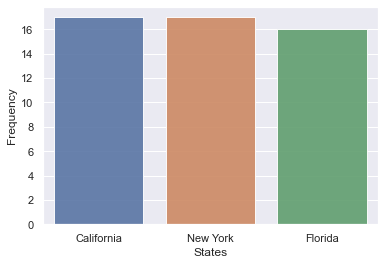

In [76]:
# Visualizing the different Startup locations

sns.set(style="darkgrid")
sns.barplot(state_count.index, state_count.values, alpha=0.9)
plt.xlabel('States')
plt.ylabel('Frequency')
plt.show()

In [77]:
#Changes does not effect the "start" dataframe

df = start.copy()

In [78]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[: , -2] = labelencoder.fit_transform(df.iloc[: , -2])
df

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              50 non-null     float64
 1   Administration  50 non-null     float64
 2   MS              50 non-null     float64
 3   State           50 non-null     int32  
 4   Profit          50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [80]:
df.describe()

,RD,Administration,MS,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Startup Profit Distribution Plot'}, xlabel='Profit', ylabel='Density'>

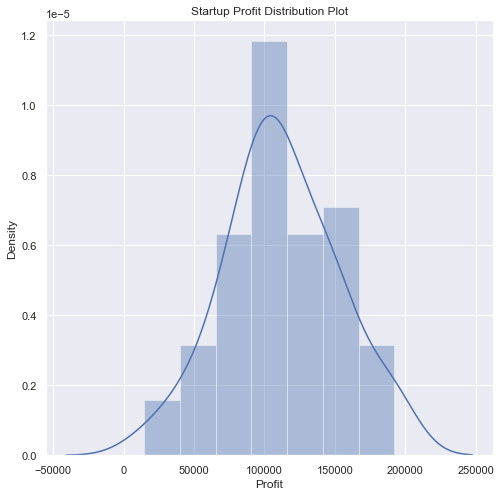

In [81]:
plt.figure(figsize=(8,8))
plt.title('Startup Profit Distribution Plot')
sns.distplot(df['Profit'])

In [82]:
df.corr()

,RD,Administration,MS,State,Profit
RD,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
MS,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


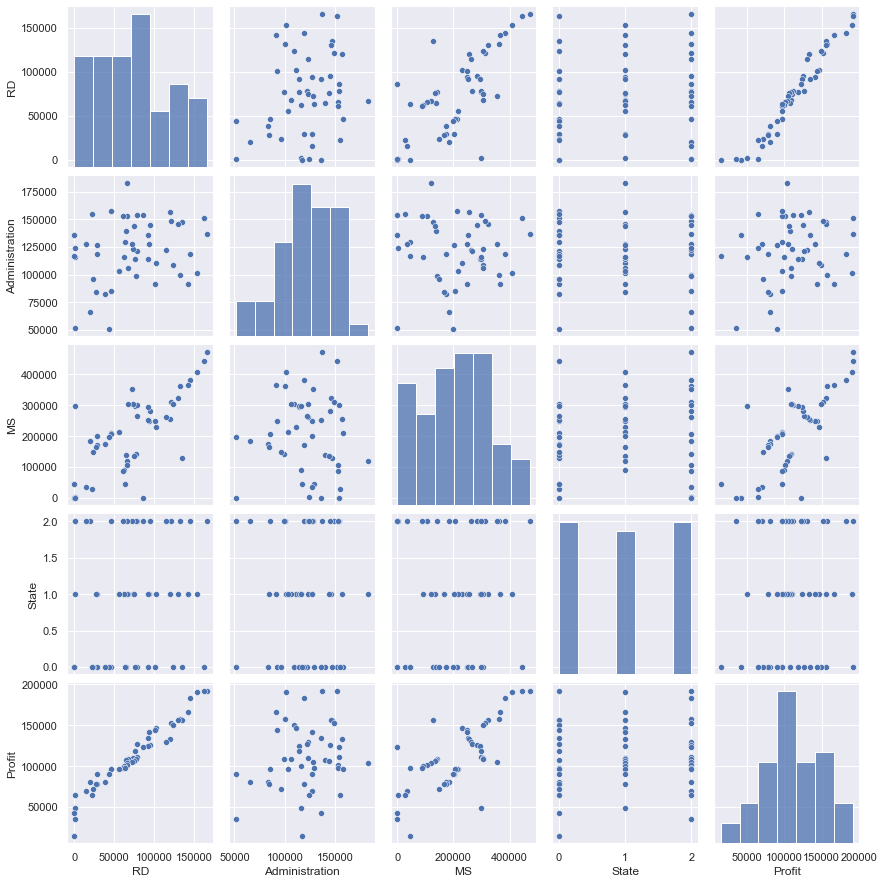

In [83]:
sns.pairplot(df)

# MODEL BUILDING

In [84]:
import statsmodels.formula.api as smf
model = smf.ols(formula = "Profit ~ RD + Administration + MS + State", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           8.51e-29
Time:                        14:27:09   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD                 0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
MS                 0.0272      0.017      1.637      0.109      -0.006       0.061
State            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
model_Ad = smf.ols(formula = "Profit ~ Administration", data=df).fit()
model_Ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.162
Time:                        14:27:09   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
model_state = smf.ols(formula = "Profit~State", data=df).fit()
model_state.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.482
Time:                        14:27:09   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
State       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### CALCULATING VIF VALUES

In [87]:
rsq_dr = smf.ols('RD~Administration+MS+State',data=df).fit().rsquared  
vif_dr = 1/(1-rsq_dr) 

rsq_admin = smf.ols('Administration~RD+MS+State',data=df).fit().rsquared  
vif_admin = 1/(1-rsq_admin)

rsq_ms = smf.ols('MS~Administration+RD+State',data=df).fit().rsquared  
vif_ms = 1/(1-rsq_ms) 

rsq_s = smf.ols('State~Administration+RD+MS',data=df).fit().rsquared  
vif_s = 1/(1-rsq_s) 

# Storing vif values in a data frame
d1 = {'Variables':['RD','Administration','MS','State'],'VIF':[vif_dr,vif_admin,vif_ms,vif_s]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.481178
1,Administration,1.175315
2,MS,2.326780
3,State,1.011281


# RESIDUAL ANALYSIS

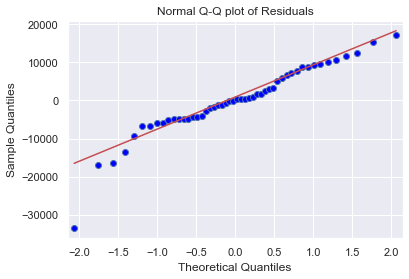

In [88]:

import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of Residuals")
plt.show()

# residual v/s regression

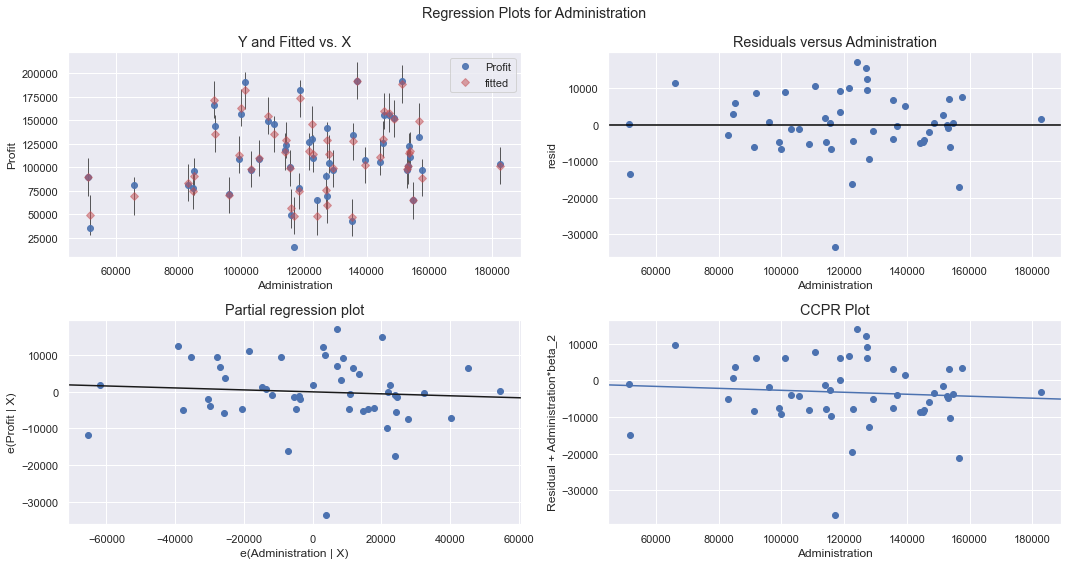

In [89]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Administration', fig=fig)
plt.show()

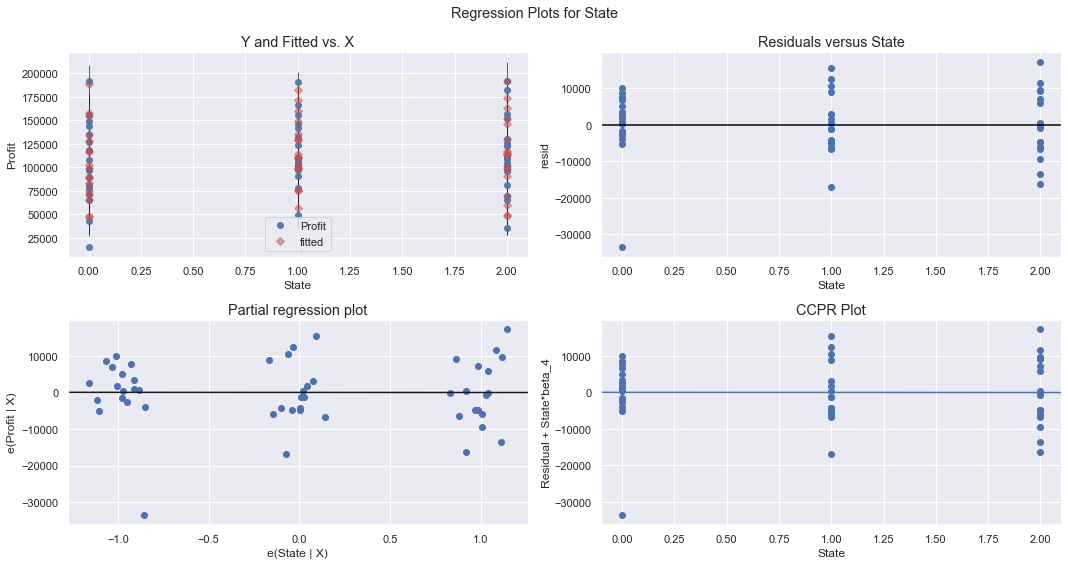

In [90]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'State', fig=fig)
plt.show()

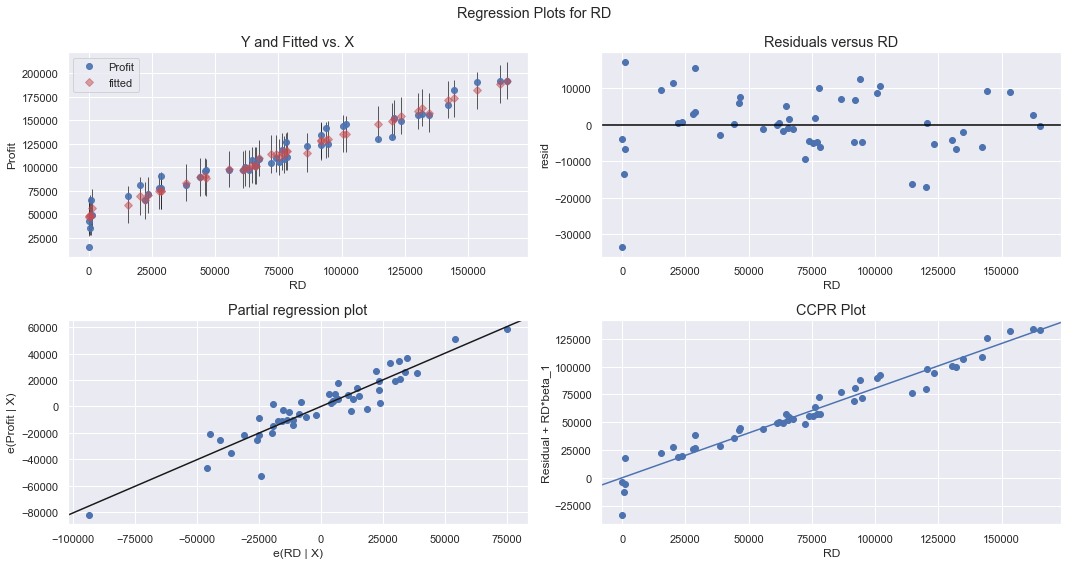

In [91]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'RD', fig=fig)
plt.show()

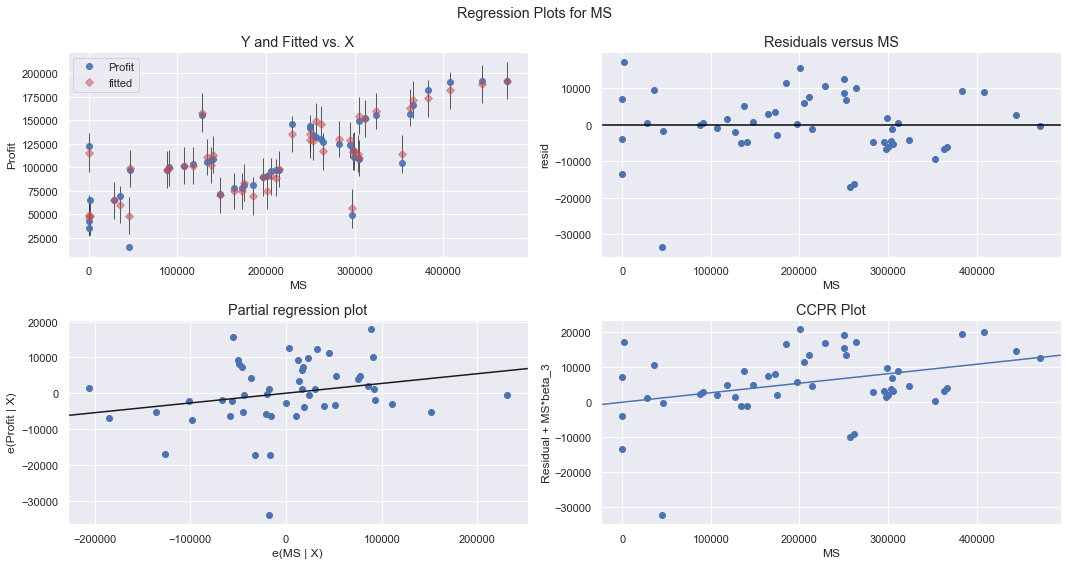

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'MS', fig=fig)
plt.show()

## DETECTING OUTLIERS

COOKS distance

In [93]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

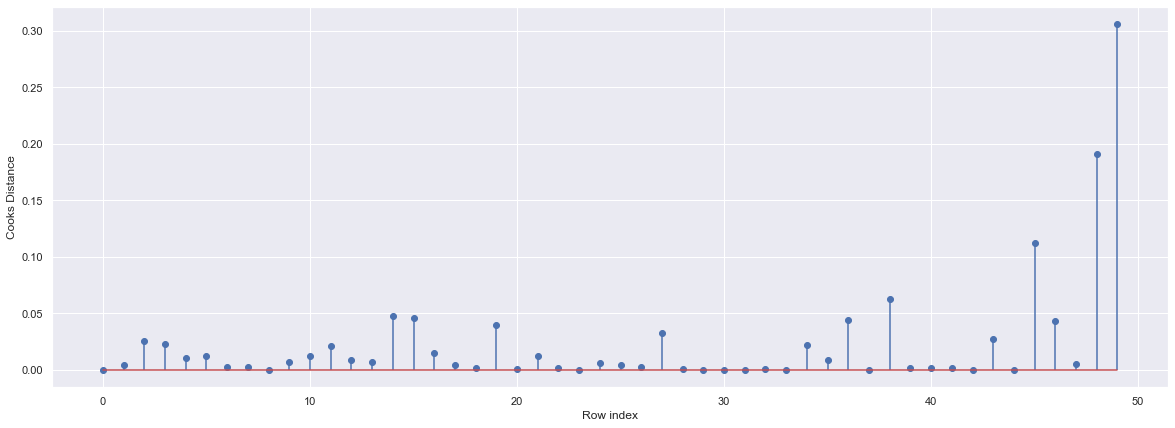

In [94]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [95]:
# index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.3060281954699332)

# HIGH INFLUENCE POINTS

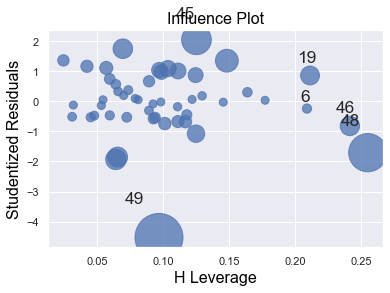

In [96]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [97]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [98]:
df[df.index.isin([48 , 49])]

,RD,Administration,MS,State,Profit
48,542.05,51743.15,0.00,2,35673.41
49,0.00,116983.80,45173.06,0,14681.40


In [99]:
df.head(10)

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [100]:
df.shape

(50, 5)

# IMPROVING THE MODEL

In [101]:
df_new = df

In [102]:
# Discard the points that are influencers and reassign the row number (reset_index())
startups1 = df_new.drop(df_new.index[[48,49]],axis = 0).reset_index()

In [103]:
# Drop the original index
startups1 = startups1.drop(['index'],axis = 1)

In [106]:
startups1.head()

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [107]:
startups1.shape

(48, 5)

In [108]:
# Check the Accuracy of model

finalmodel = smf.ols('Profit~RD+Administration+MS+State', data=startups1).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     277.7
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           4.18e-30
Time:                        14:27:29   Log-Likelihood:                -493.30
No. Observations:                  48   AIC:                             996.6
Df Residuals:                      43   BIC:                             1006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.927e+04   6021.622      9.843      0.000    4.71e+04    7.14e+04
RD                 0.7898      0.037     21.480      0.000       0.716       0.864
Administration    -0.0626      0.045     -1.406      0.167      -0.152       0.027
MS                 0.0171      0.014      1.245      0.220      -0.011       0.045
State           -326.7063   1325.527     -0.246      0.806   -2999.886    2346.473
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.517
Skew:                           0.081   Prob(JB):                        0.772
Kurtosis:                       2.518   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# PREDICTING FOR NEW DATA

In [109]:
pred_y = finalmodel.predict(startups1)
pred_y

0     188691.663530
1     185790.357535
2     180761.889557
3     171753.791062
4     171708.114064
5     162717.763405
6     158559.692036
7     158272.223695
8     149831.701814
9     155082.931380
10    136424.223066
11    137298.242571
12    129372.671089
13    127757.998367
14    148255.711836
15    145861.378816
16    117785.682202
17    129119.646686
18    129293.693104
19    117267.454225
20    117465.065644
21    116019.622202
22    114875.417079
23    110862.030119
24    115652.834437
25    103964.340304
26    111706.919945
27    113590.607882
28    101698.661089
29    102684.958141
30    102226.363396
31     98853.225539
32    102052.449581
33     99985.392712
34     89665.884676
35     93142.748488
36     77062.371770
37     94228.717421
38     73627.499062
39     87516.520738
40     77510.048275
41     78478.229533
42     74447.533771
43     63499.266821
44     67583.597381
45     51671.175165
46     57802.163395
47     50796.675392
dtype: float64

In [111]:
new_data = pd.DataFrame({'RD':200000, 'Administration':9000, 'MS':150000, 'State':2}, index=[1])

In [112]:
finalmodel.predict(new_data)

1    218575.82133
dtype: float64

In [113]:
finalmodel.predict(startups1.iloc[0:5,])

0    188691.663530
1    185790.357535
2    180761.889557
3    171753.791062
4    171708.114064
dtype: float64